In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Display the Measurement's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d879586520>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(f"The most recent date in the data set is: {recent_date}")

The most recent date in the data set is: ('2017-08-23',)


<AxesSubplot:xlabel='Date', ylabel='Inches'>

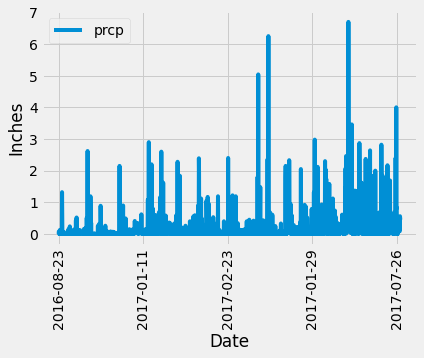

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Select only the "date" and "prcp" values.
# Load the query results into a Pandas DataFrame, and set the index to the "date" column.
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.date <= '2017-08-23')

prcp_df = pd.DataFrame(prcp_data).dropna(axis=0)
prcp_df.set_index('date', inplace=True)

# Sort the DataFrame values by "date".
prcp_df.sort_values(by=['date'])

# Plot the results by using the DataFrame plot method
prcp_df.plot(kind='line', rot=90, xlabel='Date', ylabel='Inches')

Last date in dataset is: ('2017-08-23',)
The date a year before the last date: 2016-08-23


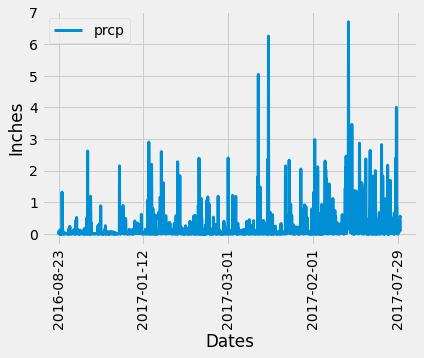

In [12]:
# Calculate the date one year from the last date in data set.
end_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Last date in dataset is: {end_date}")

start_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"The date a year before the last date: {start_date}")

# Perform a query to retrieve the data and precipitation scores
prcp_scores_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date < end_date[0])

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_score_df = pd.DataFrame(prcp_scores_data).dropna(axis=0)
prcp_score_df.set_index('date', inplace=True)

# Sort the dataframe by date
prcp_score_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_score_df.plot(linewidth=3, alpha=1, rot=0)

plt.ylabel('Inches')
plt.xlabel('Dates')
plt.xticks(rotation=90)

plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_score_df.describe()

,prcp
count,2017.000000
mean,0.177367
std,0.461568
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Display the Station's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d876f7e3a0>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [15]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).count()
print(f"There are {station_count} stations")

There are 9 stations


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
query = "SELECT station, count(station) AS count FROM Measurement \
            GROUP BY station ORDER BY count(station) DESC"

active_station_df = pd.read_sql(query, conn)
active_station_df

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_id = active_station_df['station'][0]

highest_temp = session.query(func.max(Measurement.tobs)).\
filter(Measurement.station == active_station_id).scalar()
print(f"Highest temperature is: {highest_temp}")

lowest_temp = session.query(func.min(Measurement.tobs)).\
filter(Measurement.station == active_station_id).scalar()
print(f"Lowest temperature is: {lowest_temp}")

avg_temp = session.query(func.round(func.avg(Measurement.tobs))).\
filter(Measurement.station == active_station_id).scalar()
print(f"Average temperature for most active staion is : {avg_temp}")


Highest temperature is: 85.0
Lowest temperature is: 54.0
Average temperature for most active staion is : 72.0


The most recent date in the data set is ('2017-08-23',)


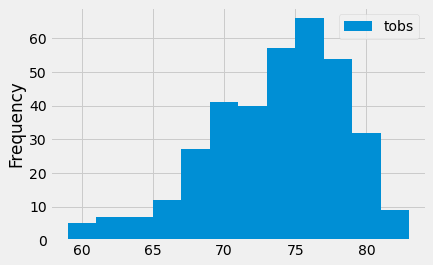

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_id = active_station_df['station'][0]

# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
print(f"The most recent date in the data set is {recent_date}")

station_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == active_station_id).\
    filter(Measurement.date >= '2016-08-18').\
    filter(Measurement.date < '2017-08-19').all()

station_temp_df = pd.DataFrame(station_temp, columns=['date', 'tobs'])
station_temp_df.set_index('date', inplace=True)

# Plot the results by using the DataFrame plot method
plot = station_temp_df.plot(kind='hist', bins=12)

plt.set_xlabel='Temperature'
plt.show()

# Close session

In [19]:
# Close Session
session.close()